<a href="https://colab.research.google.com/github/Anubhav3084/Machine-Learning-Foundations-and-Applications/blob/main/assignment%201/19EC3AI15_assginment1_MLFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2

In [2]:
# load the video file
cap = cv2.VideoCapture("video-data-for-assignment-1.mp4")

## **Getting Number of frames in the video**

In [3]:
# check if the video is opened or not
if cap.isOpened() is False:
    print("Error in opening video")
else:
    # get the number of frames from get() method
    num_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    print(f"Number of frames in this video = {num_frames}")

Number of frames in this video = 337.0


## **Getting the keyframes in the video**
**Algorithm:**
* ***Step 1:***
        For each video frame k = 1 to N
        Read frame Vk and Vk+1
        Obtain the gray level image for Vk and Vk+1
        Gk = Gray image of Vk
        Gk+1 = Gray image of Vk+1
        Find the edge difference between Gk and Gk+1 using the Canny edge detector
        Let difference(k) be their difference, difference(k) = l2 norm of the frames
* ***Step 2:***
        Compute the mean and standard deviation
* ***Step 3:***
        Compute the threshold value
        Threshold= M + a*S, where a = constant
* ***Step 4:***
        Find the key frames for k = 1 to (N-1)
        if difference(k) > Threshold then
            Write Vk+1 as the output key-frame

#### **Step-1**

In [4]:
frames = []
canny_frames = []

while cap.isOpened():
    ret, frame = cap.read()
    if ret is False:
        break
    else:
        frames.append(frame)
        grayed_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        canny_frames.append(cv2.Canny(grayed_frame, 50, 150))

print(len(frames), len(canny_frames))

337 337


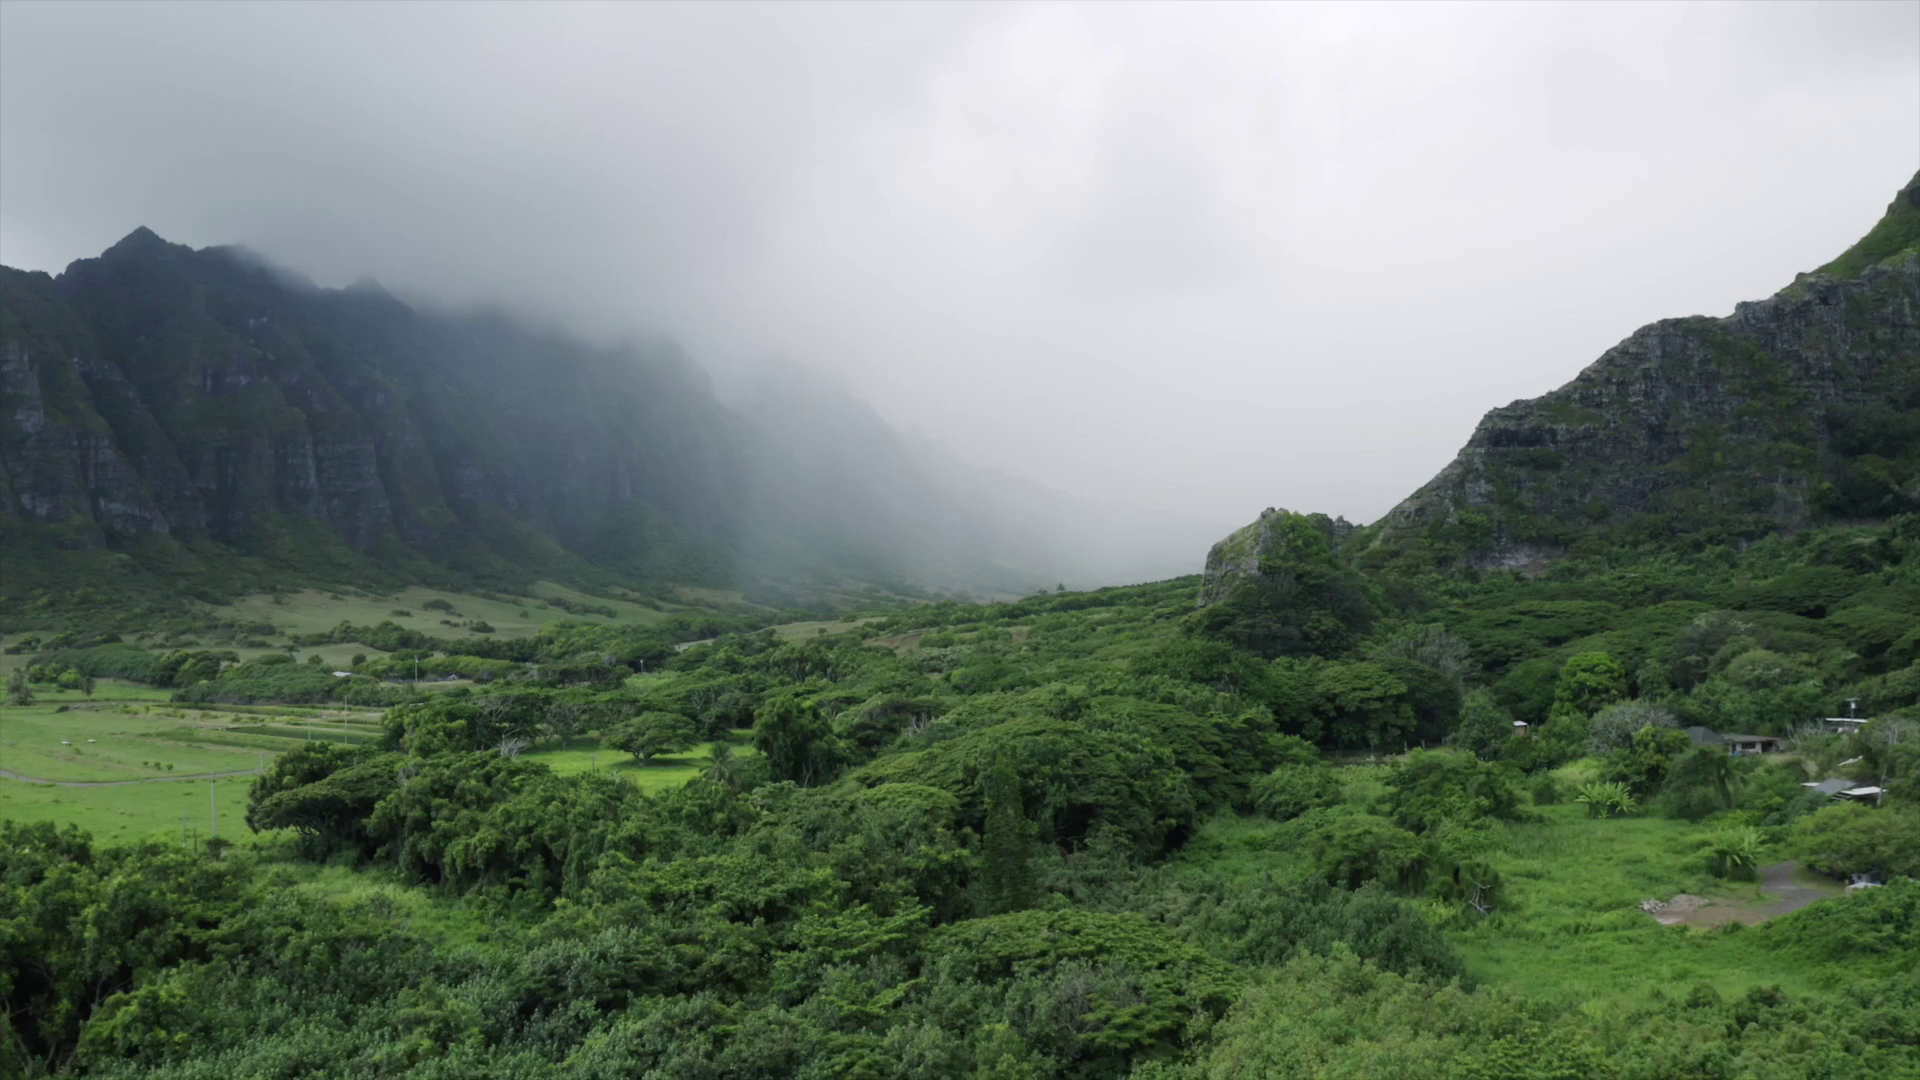

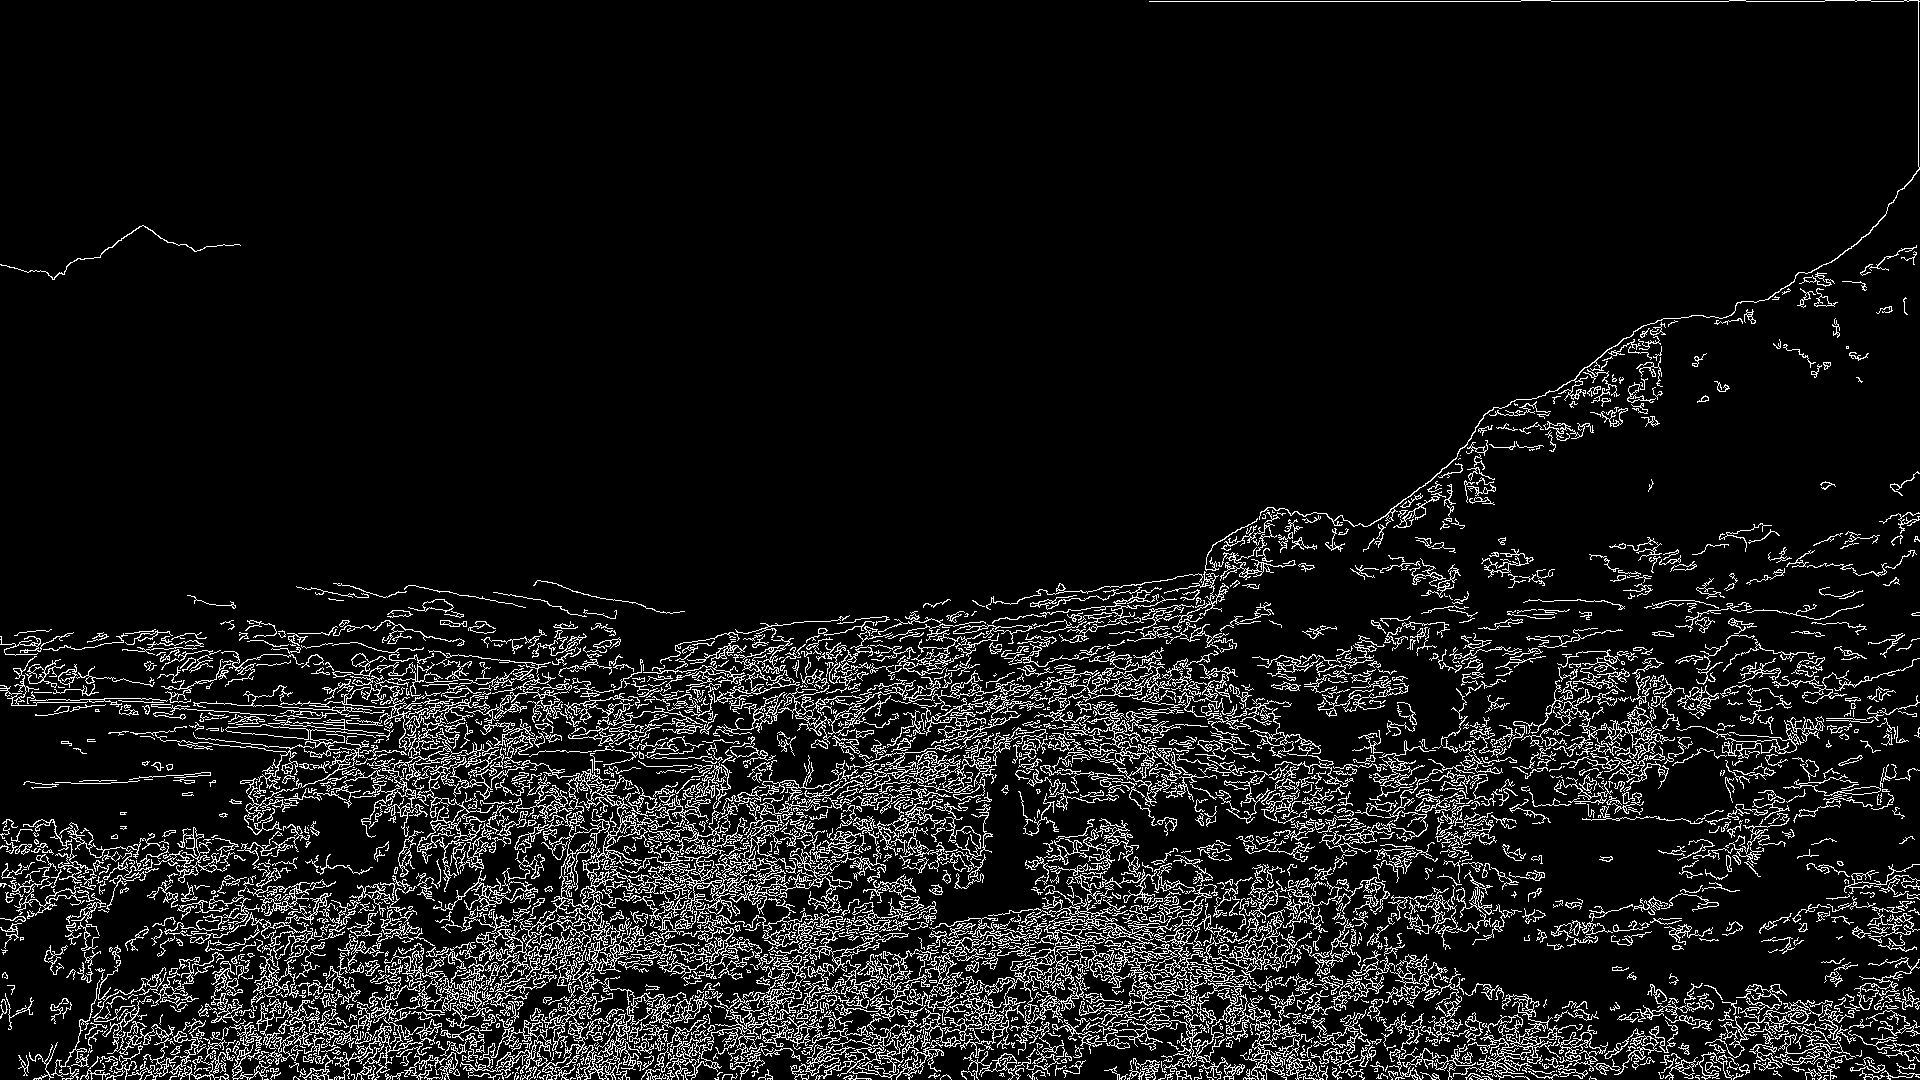

In [5]:
from google.colab.patches import cv2_imshow

cv2_imshow(frames[0])
cv2_imshow(canny_frames[0])

* Creating **distance** function **L2 - norm** to calculate the distance between the images

In [6]:
import numpy as np

def l2_distance(frame1, frame2):
    return np.sqrt(np.sum(np.abs(frame1-frame2)**2))

In [7]:
difference = []

for i in range(len(canny_frames)-1):
    difference.append(l2_distance(canny_frames[i + 1], canny_frames[i]))

len(difference)

336

#### **Step-2**
* calculating mean and standard deviation

In [8]:
mean = np.mean(difference)
standard_deviation = np.std(difference)

print(mean, standard_deviation)

447.56266339338373 8.563061759489528


#### **Step-3** 
* Calculating Threshold value

In [9]:
a = 2 # set the random value to 2
Threshold = mean + (a * standard_deviation)
print("Threshold : ", Threshold)

Threshold :  464.6887869123628


#### **Step-4** 
* Extracting the frames

In [10]:
key_frames = []

for i in range(len(canny_frames)-1):
    distance_between_frames = l2_distance(canny_frames[i + 1], canny_frames[i])
    
    if distance_between_frames > Threshold:
        key_frames.append(frames[i])

print("Number of Keyframes in this video are :", len(key_frames))

Number of Keyframes in this video are : 6


## **Printing the key frames**

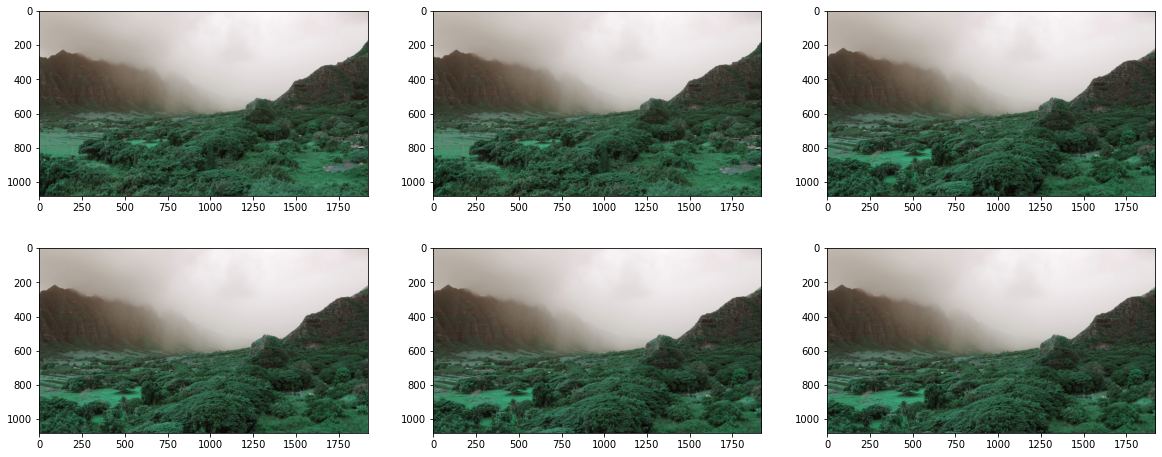

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))

for i in range(len(key_frames)):
    plt.subplot(2,3,i + 1)
    plt.imshow(key_frames[i])

plt.show()